# Medical Insurance Cost Prediction
------
<img src="https://user-images.githubusercontent.com/32620288/193653781-6108c432-1ec6-43d2-93eb-a488b01de508.png" width="700" height="1">

--------

#### <font color='red'>Problem Statement  </font>

Understanding the relation between the various factor like bmi, number of children or smoker affecting the Hosiptalization charges. Predicting the hospitalization by understanding patterns from other parameters.

#### <font color='Green'>Understanding the data  </font>

* age : age of primary beneficiary
* sex : insurance contractor gender, female, male
* bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children : Number of children covered by health insurance / Number of dependents
* smoker : Smoking
* region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges : Individual medical costs billed by health insurance
-----------------------------

### Importing the libraries

In [111]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#%matplotlib inline
import seaborn as sns
dark = sns.color_palette('dark')
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Prepare Data and EDA

In [112]:
#Reading dataset
df = pd.read_csv('D:\Datasets of AB\dataset\insurance.csv')

In [113]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [114]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Checking data dimension

In [115]:
print('Dimension of Insurance Data:', df.shape)

Dimension of Insurance Data: (1338, 7)


In [116]:
#Index
print(f'Column names are :', list(df.columns))

Column names are : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [117]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [119]:
# duplicate
len(df[df.duplicated()])

1

In [120]:
print(df.apply(lambda col: col.unique()))

age         [19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...
sex                                            [female, male]
bmi         [27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...
children                                   [0, 1, 3, 2, 5, 4]
smoker                                              [yes, no]
region           [southwest, southeast, northwest, northeast]
charges     [16884.924, 1725.5523, 4449.462, 21984.47061, ...
dtype: object


In [121]:
# Identifying the unique number of values in the dataset
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Visualizing the missing values

<AxesSubplot:>

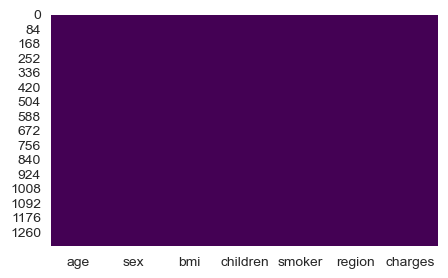

In [122]:
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [123]:
# Viewing the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Top beneficiary's age when purchasing medical insurance

In [124]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [125]:
df.age.value_counts().head(5)

18    69
19    68
50    29
51    29
47    29
Name: age, dtype: int64

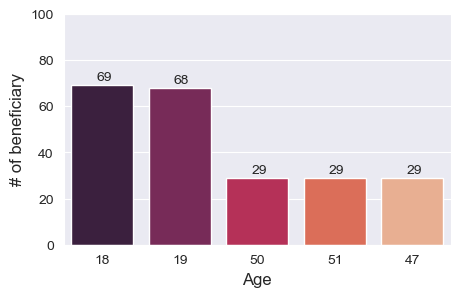

In [126]:
plt.figure(figsize=(5,3))
sns.set_style('darkgrid')
ax = sns.countplot('age',data=df,order=df['age'].value_counts()[:5].index,palette='rocket')

plt.xlabel("Age", fontsize= 12)
plt.ylabel("# of beneficiary", fontsize= 12)
plt.ylim(0,100)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+2))
    
plt.show()

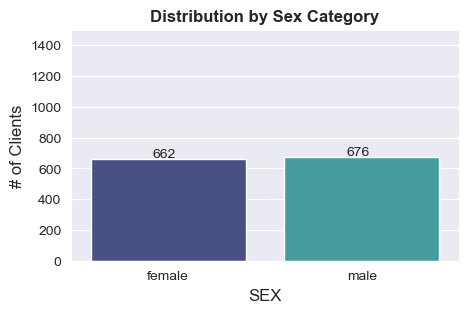

In [127]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="sex", data=df, palette="mako")

plt.xlabel("SEX", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)
plt.title('Distribution by Sex Category',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+10))
    
plt.show()

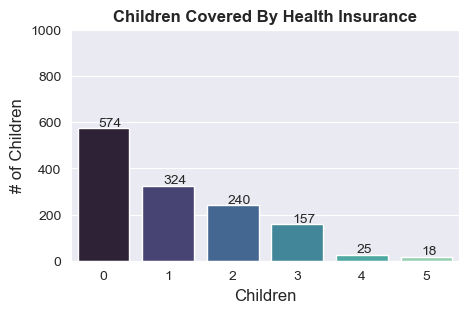

In [128]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="children", data=df, palette="mako")

plt.xlabel("Children", fontsize= 12)
plt.ylabel("# of Children", fontsize= 12)
plt.ylim(0,1000)
plt.title('Children Covered By Health Insurance',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+10))
    
plt.show()

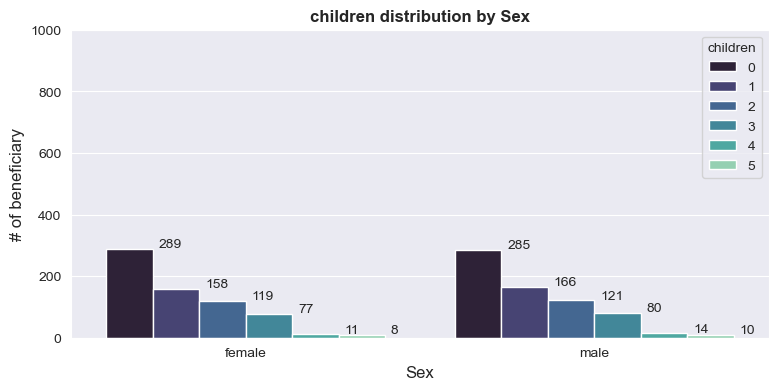

In [129]:
# Plot a bar chart to visualize children. female and male
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, x = 'sex', hue="children", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of beneficiary", fontsize= 12)
plt.ylim(0,1000)

plt.title('children distribution by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+5))

plt.show()

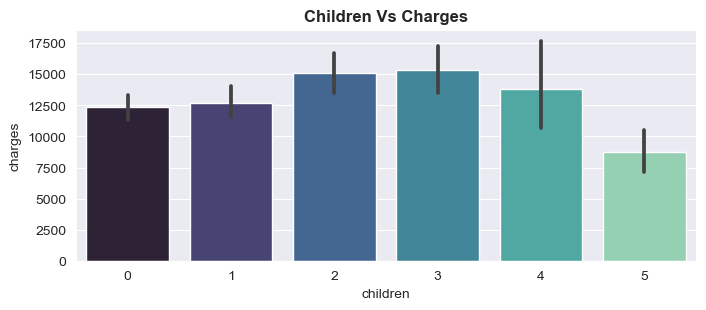

In [130]:
plt.figure(figsize=(8,3))
ax = sns.barplot(x='children',y='charges',data=df, palette = 'mako')
plt.title('Children Vs Charges',weight ='bold')
plt.show()

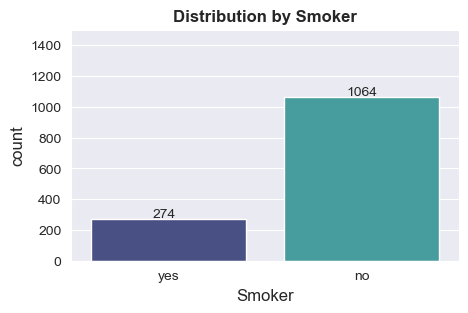

In [131]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="smoker", data=df, palette="mako")

plt.xlabel("Smoker", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.ylim(0,1500)
plt.title('Distribution by Smoker',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+10))
    
plt.show()

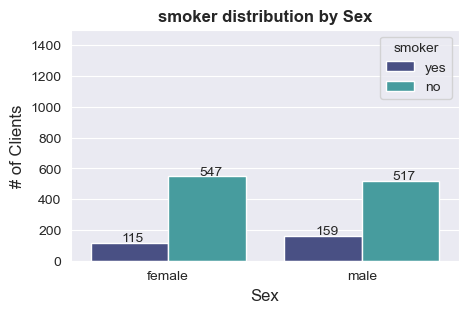

In [132]:
# Plot a bar chart to visualize smoker. female and male
plt.figure(figsize=(5,3))

ax = sns.countplot(data = df, x = 'sex', hue="smoker", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)

plt.title('smoker distribution by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+10))

plt.show()

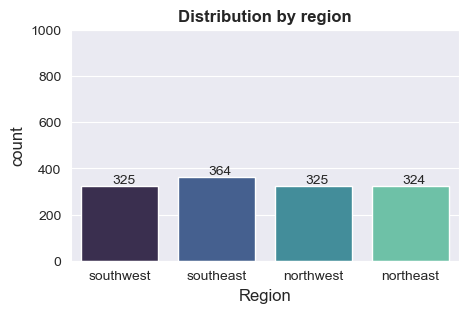

In [133]:
plt.figure(figsize=(5,3))

ax = sns.countplot(x="region", data=df, palette="mako")

plt.xlabel("Region", fontsize= 12)
plt.ylabel("count", fontsize= 12)
plt.ylim(0,1000)
plt.title('Distribution by region',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+10))
    
plt.show()

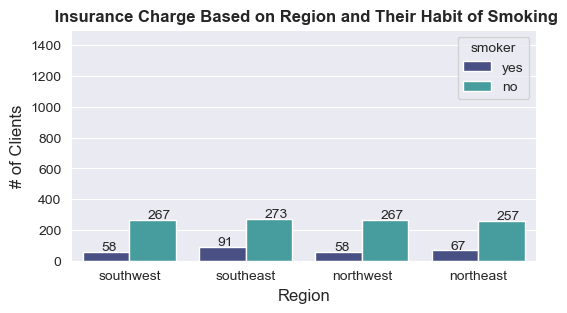

In [134]:
# Plot a bar chart to visualize smoker. female and male
#Region vs Smoker

plt.figure(figsize=(6,3))

ax = sns.countplot(data = df, x = 'region', hue="smoker", palette = 'mako')

plt.xlabel("Region", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,1500)

plt.title(' Insurance Charge Based on Region and Their Habit of Smoking',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+10))

plt.show()

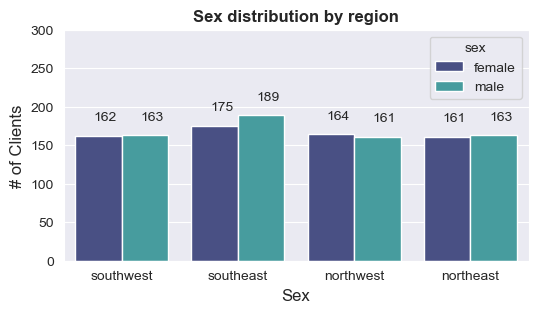

In [135]:
# Plot a bar chart to visualize region. female and male
plt.figure(figsize=(6,3))

ax = sns.countplot(data = df, x = 'region', hue="sex", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,300)

plt.title('Sex distribution by region',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+20))

plt.show()

Text(0.5, 1.0, 'Regions With Oldest People')

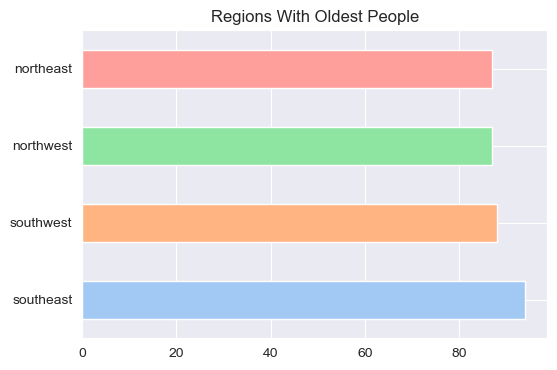

In [136]:
pastel = sns.color_palette('pastel')
#Region With Oldest People (Age >50)
ax = df[df['age']>50]['region'].value_counts().plot.barh(color=pastel,figsize=(6,4))
plt.title('Regions With Oldest People')

### Age vs Charges

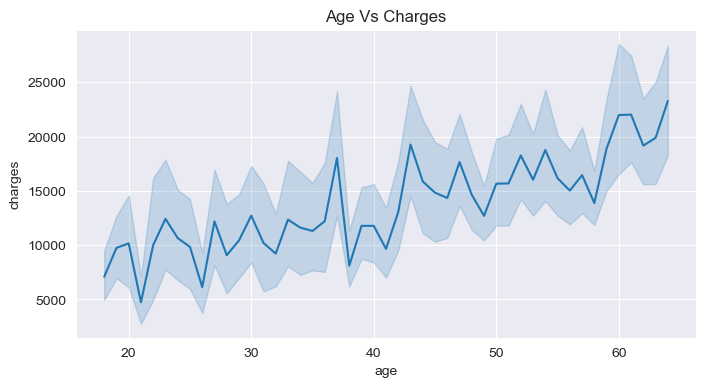

In [137]:
plt.figure(figsize=(8,4))
sns.lineplot(x='age',y='charges',data=df)
plt.title('Age Vs Charges')
plt.show()

The above graph shows that insurance charges increase with age, which is generally true since people of higher ages are more likely to die.

### Age vs BMI

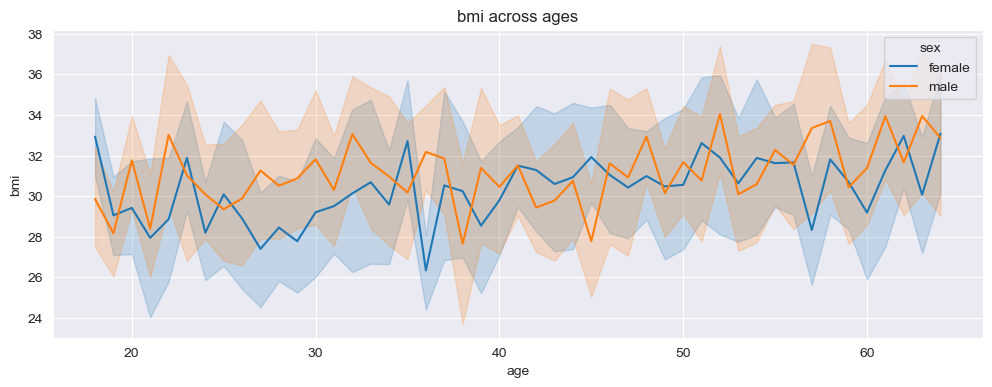

In [138]:
plt.figure(figsize=(12,4))
sns.lineplot(x='age',y='bmi',data=df,hue='sex')
plt.title('bmi across ages')
plt.show()

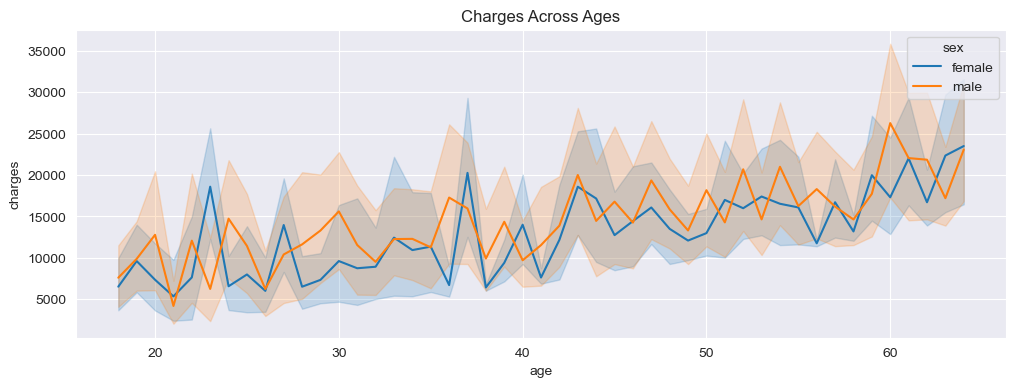

In [139]:
plt.figure(figsize=(12,4))
sns.lineplot(x='age',y='charges',data=df,hue='sex')
plt.title('Charges Across Ages')
plt.show()

In [140]:
## Handling Categorical Data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

So here are three Categorical columns [sex, smoker, region] and we are going to handle Categorical Data.

Label Encoding Refers To a Technique In Which Each Categorical Variable is Given a Numerical Label(0,1,2,3...). We Will Use This Method To Convert Oue Categories Into Numerical Form

### Label Encoding All Categorical Columns

In [141]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['sex']= le.fit_transform(df['sex']) 
df['smoker']= le.fit_transform(df['smoker'])
df['region']= le.fit_transform(df['region'])

In [142]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [143]:
# finding the correlation
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Notice that all variables have positive correlations with each other with

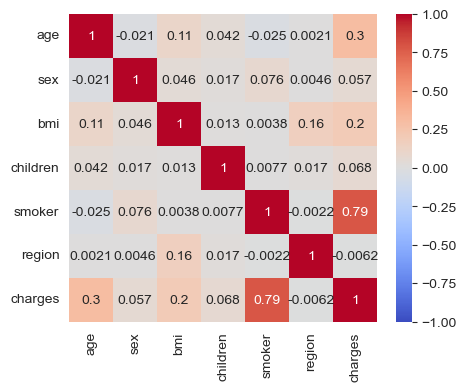

In [144]:
plt.figure(figsize = (5,4))
sns.heatmap(df.corr("pearson"),vmin = -1, vmax=1,cmap='coolwarm',annot=True, square=True);

There are no highly correlated variables in the dataset, so we will keep our dataset as-is.

### Data Splitting and Scaling

#### *Let's import libraires needed in this modeling part*

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [146]:
# Splitting the dataset into the Training set and Test set
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [147]:
df.shape

(1338, 7)

In [148]:
##Let's create an object to report results
reporting={}

In [149]:
#preview
features = df.columns[0:6]
target = df.columns[-1]

In [150]:
## Data splitting
##X and y values
#-----------------------------------------------
## independent features
X = df.drop('charges',axis=1).values #features 
#-----------------------------------------------
## dependent features
y = df['charges'].values #target

In [151]:
##split
# assign test data size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print(X_train.shape)

(1070, 6)


In [153]:
print(y_train.shape)

(1070,)


In [154]:
print(X_test.shape)

(268, 6)


In [155]:
print(y_test.shape)

(268,)


In [156]:
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [158]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])


### <font color='Blue'>-- Linear Regression --  </font>


In [159]:
reg_lr = LinearRegression()
reg_lr.fit(X_train,y_train)

LinearRegression()

In [160]:
reg_lr.coef_

array([ 3.61610865e+03, -9.39295411e+00,  2.02830858e+03,  5.16662566e+02,
        9.55714338e+03, -3.02387980e+02])

In [161]:
# Predicting the Test set results
y_pred = reg_lr.predict(X_test)

In [162]:
print("Linear Regression Model Training Score: ", reg_lr.score(X_train, y_train))

Linear Regression Model Training Score:  0.7417049283233981


In [163]:
print("Linear Regression Model Testing Score: ", reg_lr.score(X_test, y_test))

Linear Regression Model Testing Score:  0.7833463107364537


In [164]:
'''
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)
'''

'\n# calculating Mean Squared Error (mse)\nmean_squared_error = np.mean((y_pred - y_test)**2)\nprint("Mean squared Error on test set : ", mean_squared_error)\n'

In [165]:
'''
# fitting the size of the plot
plt.figure(figsize=(15, 8))

# plotting the graphs for actual-value and predicted values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")

# showing the plotting of predictive modelling technique
plt.legend()
plt.show()
'''

'\n# fitting the size of the plot\nplt.figure(figsize=(15, 8))\n\n# plotting the graphs for actual-value and predicted values\nplt.plot([i for i in range(len(y_test))],y_test, label="actual-values")\nplt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")\n\n# showing the plotting of predictive modelling technique\nplt.legend()\nplt.show()\n'

As we can see, our model has performed well and followed the trend to give an accurate prediction.

In [166]:
predregrtrain = reg_lr.predict(X_train)
predregrtest = reg_lr.predict(X_test)

*After fitting the model, we print the score between predictions and test targets*

In [167]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.7417049283233981 and the train root mean square is: 6105.789320191615
Linear model, R2 test score is : 0.7833463107364537 and the test root mean square is: 5799.587091438359


In [168]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  33635210.431178436


In [169]:
reporting['Linear regression']=test_set_r2

### Ridge regression
*What is Ridge regression ? The main idea begin Ridge Regression is to find a new line that doesn't fit the training data. Ridge regression can provide better long term regression. The goal of the regularization parameter alpha is to reduce the variation Ridge regression is interesting when we have only very interesting features on the dataset.*

In [170]:
'''
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
'''

#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))



Ridge Model............................................

The train score for ridge model is 0.7416386545890525
The test score for ridge model is 0.7828646202089276


In [171]:
reporting['Ridge regression']=test_score_ridge

*Using an alpha value of 10, the evaluation of the model, the train, and test data indicate better performance on the ridge model than on the linear regression model.*

We can also plot the coefficients for both the linear and ridge models.

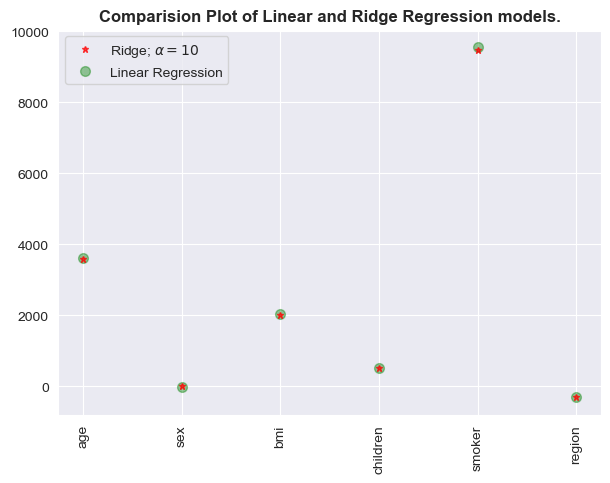

In [172]:
plt.figure(figsize = (7, 5))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,reg_lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.title('Comparision Plot of Linear and Ridge Regression models.',weight ='bold')
plt.legend()
plt.show()

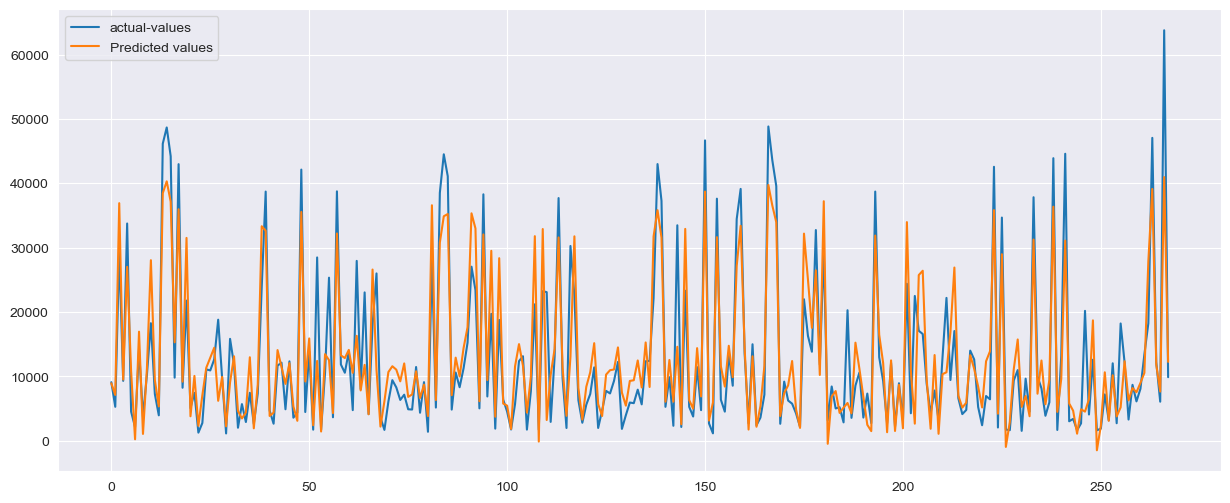

In [173]:
# fitting the size of the plot
plt.figure(figsize=(15, 6))

# plotting the graphs for actual-value and predicted values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],y_pred, label="Predicted values")

# showing the plotting of predictive modelling technique
plt.legend()
plt.show()

### Lasso Regression

In [174]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)
# predictive model of lasso regression with test data
lasso_predictions = lasso.predict(X_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.7417007793309526
The test score for ls model is 0.7831800046656066


We can visualize the coefficients too.

<AxesSubplot:>

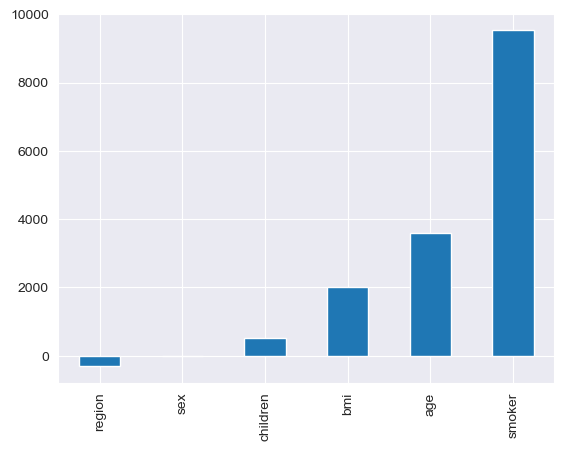

In [175]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")

### Selecting Optimal Alpha Values Using Cross-Validation in Sklearn
We may need to try out different alpha values to find the optimal constraint value. For this case, we can use the cross-validation model in the sklearn package. This will try out different combinations of alpha values and then choose the best model.

In [176]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))


0.7417007793309526
0.7831800046656066


The model will be trained on different alpha values that I have specified in the LassoCV function. We can observe a better performance of the model, removing the tedious effort of manually changing alpha values. We can compare the coefficients from the lasso model with the rest of the models (linear and ridge).

In [177]:
reporting['Lasso regression']=test_score_ls

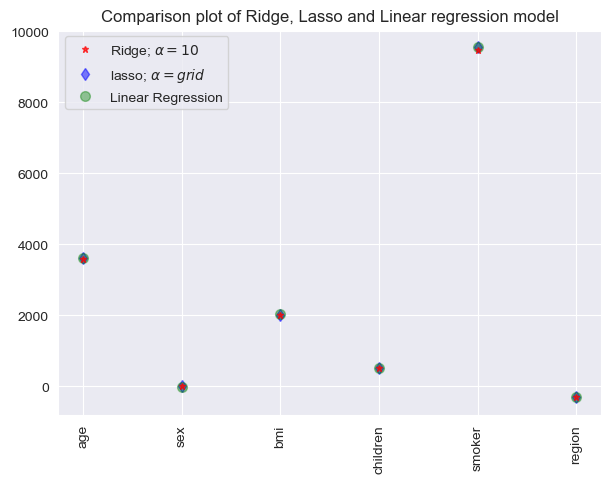

In [178]:
#plot size
plt.figure(figsize = (7, 5))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#addd plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,reg_lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

Note: A similar approach could be employed for the ridge regression model, which could lead to better results. In the sklearn package, the function RidgeCV performs similarly.

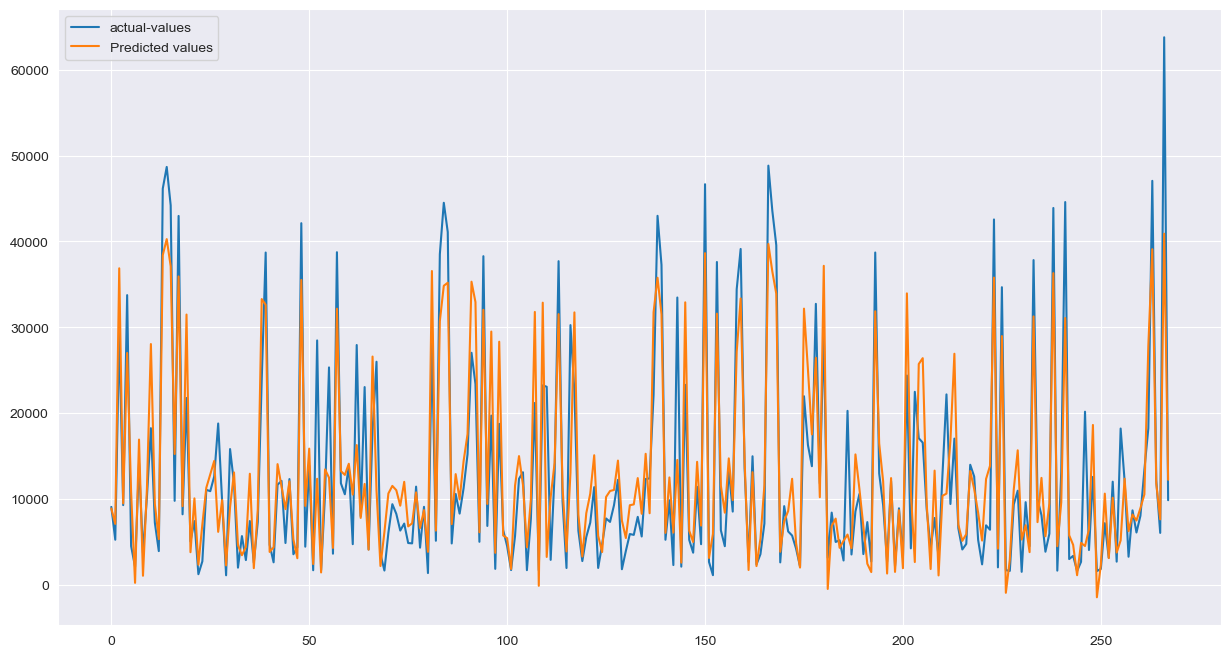

In [179]:
# fitting the size of the plot
plt.figure(figsize=(15, 8))

# plotting the graphs for observed value and real values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],lasso_predictions, label="Predicted values")

# showing the plotting of lasso regression
plt.legend()
plt.show()

In [180]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score']=reporting.values()

df_results=df_results.set_index('model')

dfVizModels=pd.DataFrame(df_results['Score'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score
model,
Linear regression,0.783346
Lasso regression,0.783180
Ridge regression,0.782865


------------------------------------------------------------------------------------------------------------------------

##### -------------------------------------------------------------------------------- Ridge ------------------------------------------------------------------------------------------------------------------------

In [181]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.7417042540295931
The train score for ridge model is 0.7833037457661067


In [182]:
X_RidgeRegression=df.drop('charges',axis=1).values
y= df['charges'].values #the target
X_train,X_test,y_train,y_test=train_test_split(X_RidgeRegression,y,test_size=0.2)

In [183]:
errors=[]
coefs=[]
alphas=[0.0001, 0.001,0.01, 0.1,0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = 0.00
 R2 training: 0.74, R2 test: 0.78

Alpha = 0.00
 R2 training: 0.74, R2 test: 0.78

Alpha = 0.01
 R2 training: 0.74, R2 test: 0.78

Alpha = 0.10
 R2 training: 0.74, R2 test: 0.78

Alpha = 0.00
 R2 training: 0.74, R2 test: 0.78

Alpha = 10.00
 R2 training: 0.74, R2 test: 0.78

Alpha = 20.00
 R2 training: 0.73, R2 test: 0.76

Alpha = 50.00
 R2 training: 0.71, R2 test: 0.73

Alpha = 6000.00
 R2 training: 0.16, R2 test: 0.09

Alpha = 1000000.00
 R2 training: 0.04, R2 test: 0.00



In [184]:
ridge=Ridge()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [185]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)

In [186]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.73
 with Alpha = 0.00
 
The best R2 test score is : 0.78
 with Alpha = 0.00
 


In [187]:
reporting['Ridge regression']=bestridge_testScore

##### -------------------------------------------------------------------------------- Lasso ------------------------------------------------------------------------------------------------------------------------

In [188]:
errors=[]
coefs=[]
alphas=[0.01, 0.1, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
    r2_train = linLasso.score(X_train, y_train)
    r2_test = linLasso.score(X_test, y_test)
    coefs.append(linLasso.coef_)
    errors.append(np.mean((linLasso.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
Lasso R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

Alpha = 0.01
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 0.10
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 0.00
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 10.00
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 20.00
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 50.00
 Lasso R2 training: 0.74, R2 test: 0.78

Alpha = 6000.00
 Lasso R2 training: 0.12, R2 test: 0.04

Alpha = 1000000.00
 Lasso R2 training: 0.00, R2 test: -0.02



In [189]:
lasso=Lasso()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)



best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)

In [190]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))

The best R2 train score is : 0.73 with Alpha = 47.00
 
The best R2 test score is : 0.78
 with Alpha = 47.00
 


In [191]:
reporting['Lasso regression']=bestLasso_testScore

In [192]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [193]:
df_results=df_results.set_index('model')

In [194]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("skyblue", as_cmap=True))

,Score R2
model,
Linear regression,0.783346
Ridge regression,0.783239
Lasso regression,0.781762


-----------------------------------

### <font color='Red'>-- Decision Tree Regressor --  </font>

In [195]:
Reg_tree=DecisionTreeRegressor(random_state=0)
Reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [196]:
Reg_tree.score(X_train,y_train)

0.9982597126378279

In [197]:
Reg_tree.score(X_test,y_test)

0.7580726287008209

In [198]:
y_test_pred_decision = Reg_tree.predict(X_test)
y_train_pred_decision = Reg_tree.predict(X_train)

In [199]:
# Test dataset metrics for Decision tree
def print_metrics(actual, predicted):
  print_metrics(np.square(y_test), np.square(y_test_pred_decision))
  print("Adjusted R2 is ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_decision)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Text(0, 0.5, 'Predicted')

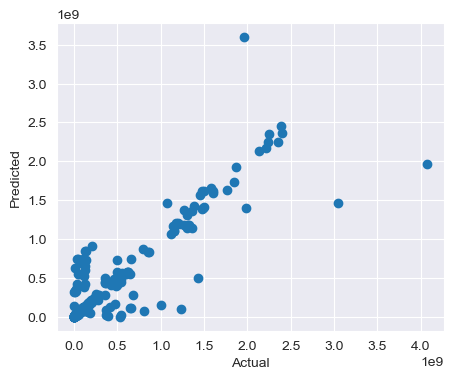

In [200]:
plt.figure(figsize=(5,4))
plt.scatter(np.square(y_test), np.square(y_test_pred_decision))
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [201]:
'''
plt.figure(figsize=(10,4))
plt.plot((y_test_pred_decision[100:150]))
plt.plot((np.array(y_test[100:150])))
plt.legend(["Predicted","Actual"])
plt.show()'''

'\nplt.figure(figsize=(10,4))\nplt.plot((y_test_pred_decision[100:150]))\nplt.plot((np.array(y_test[100:150])))\nplt.legend(["Predicted","Actual"])\nplt.show()'

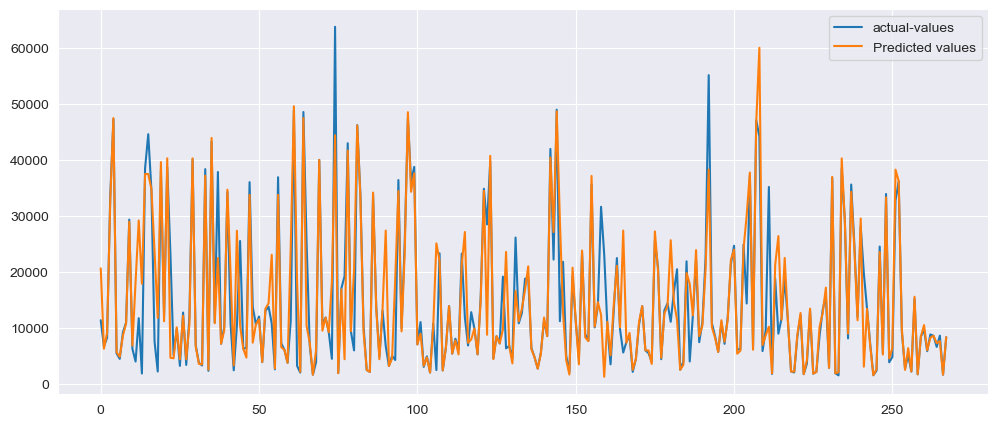

In [202]:
# fitting the size of the plot
plt.figure(figsize=(12, 5))

# plotting the graphs for observed value and real values
plt.plot([i for i in range(len(y_test))],y_test, label="actual-values")
plt.plot([i for i in range(len(y_test))],y_test_pred_decision, label="Predicted values")

# showing the plotting of lasso regression
plt.legend()
plt.show()

In [203]:
Reg_tree.feature_importances_

array([0.13433492, 0.00836836, 0.22394324, 0.02366283, 0.59677807,
       0.01291258])

### <font color='Red'>-- Random Forest Regressor --  </font>

In [204]:
import timeit
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

In [205]:
rfr = RandomForestRegressor(max_depth=10, random_state=0)

In [206]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [207]:
print("Random Forest Regressor Model Training Score: ", rfr.score(X_train,y_train))

Random Forest Regressor Model Training Score:  0.9632873102616917


In [208]:
print("Random Forest Regressor Model Testing Score: ", rfr.score(X_test,y_test))

Random Forest Regressor Model Testing Score:  0.8819439251667698


In [209]:
# Predicting the Test set results
#y_pred = rfr.predict(X_test)

In [210]:
random_forest_tuning = RandomForestRegressor(random_state = 0)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

In [211]:
from sklearn.metrics import mean_squared_error 
#as mse
# Predicting the Test set results
y_pred = rfr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  2372.5990601809094
MSE:  19906785.196372963


### <font color='Red'>-- CatBoost Regressor --  </font>

In [212]:
# importing the required module
from catboost import CatBoostRegressor

# initializing the model
cbr = CatBoostRegressor()

# training the model
cbr.fit(X_train, y_train)

Learning rate set to 0.041383
0:	learn: 11496.1969455	total: 1.2ms	remaining: 1.2s
1:	learn: 11168.1031812	total: 2.16ms	remaining: 1.08s
2:	learn: 10844.9328691	total: 2.65ms	remaining: 881ms
3:	learn: 10540.5120069	total: 3.56ms	remaining: 885ms
4:	learn: 10226.1421340	total: 4.46ms	remaining: 888ms
5:	learn: 9917.5749832	total: 5.36ms	remaining: 888ms
6:	learn: 9649.8728894	total: 6.3ms	remaining: 894ms
7:	learn: 9388.2153560	total: 7.19ms	remaining: 892ms
8:	learn: 9134.7232723	total: 8.09ms	remaining: 890ms
9:	learn: 8918.7223424	total: 9.11ms	remaining: 902ms
10:	learn: 8700.4520450	total: 9.49ms	remaining: 854ms
11:	learn: 8496.2244149	total: 10.5ms	remaining: 861ms
12:	learn: 8294.6215085	total: 11.4ms	remaining: 867ms
13:	learn: 8101.2349990	total: 12.3ms	remaining: 868ms
14:	learn: 7904.6158014	total: 13.3ms	remaining: 871ms
15:	learn: 7711.0977406	total: 13.9ms	remaining: 856ms
16:	learn: 7531.4576986	total: 14.9ms	remaining: 863ms
17:	learn: 7402.9077501	total: 15.2ms	remai

198:	learn: 3953.4653901	total: 167ms	remaining: 674ms
199:	learn: 3952.0160285	total: 169ms	remaining: 675ms
200:	learn: 3946.6339530	total: 170ms	remaining: 675ms
201:	learn: 3944.5232844	total: 171ms	remaining: 674ms
202:	learn: 3942.8584978	total: 172ms	remaining: 673ms
203:	learn: 3938.5470029	total: 172ms	remaining: 673ms
204:	learn: 3936.3731780	total: 173ms	remaining: 672ms
205:	learn: 3935.0525708	total: 174ms	remaining: 672ms
206:	learn: 3930.5086117	total: 175ms	remaining: 671ms
207:	learn: 3927.2814109	total: 176ms	remaining: 671ms
208:	learn: 3922.0873548	total: 177ms	remaining: 670ms
209:	learn: 3921.2963330	total: 178ms	remaining: 669ms
210:	learn: 3919.9932706	total: 179ms	remaining: 668ms
211:	learn: 3914.7419602	total: 180ms	remaining: 668ms
212:	learn: 3908.7227899	total: 181ms	remaining: 668ms
213:	learn: 3907.3167701	total: 182ms	remaining: 667ms
214:	learn: 3905.2421847	total: 182ms	remaining: 666ms
215:	learn: 3904.1018849	total: 183ms	remaining: 666ms
216:	learn

410:	learn: 3475.4142010	total: 354ms	remaining: 507ms
411:	learn: 3473.0432951	total: 355ms	remaining: 507ms
412:	learn: 3470.2138350	total: 356ms	remaining: 506ms
413:	learn: 3467.7483912	total: 357ms	remaining: 505ms
414:	learn: 3466.9654626	total: 358ms	remaining: 504ms
415:	learn: 3464.2859272	total: 359ms	remaining: 503ms
416:	learn: 3461.5812563	total: 359ms	remaining: 503ms
417:	learn: 3460.9463026	total: 360ms	remaining: 502ms
418:	learn: 3457.6164711	total: 361ms	remaining: 501ms
419:	learn: 3456.8526967	total: 362ms	remaining: 500ms
420:	learn: 3455.1481317	total: 363ms	remaining: 499ms
421:	learn: 3453.1797575	total: 364ms	remaining: 498ms
422:	learn: 3449.7326867	total: 365ms	remaining: 497ms
423:	learn: 3448.8175853	total: 365ms	remaining: 496ms
424:	learn: 3446.1000514	total: 366ms	remaining: 496ms
425:	learn: 3443.3432749	total: 367ms	remaining: 495ms
426:	learn: 3441.9430316	total: 368ms	remaining: 494ms
427:	learn: 3439.2863598	total: 369ms	remaining: 493ms
428:	learn

626:	learn: 3088.5090983	total: 543ms	remaining: 323ms
627:	learn: 3086.9256947	total: 544ms	remaining: 322ms
628:	learn: 3085.5283236	total: 545ms	remaining: 321ms
629:	learn: 3081.7068812	total: 546ms	remaining: 320ms
630:	learn: 3080.1263096	total: 547ms	remaining: 320ms
631:	learn: 3078.1789370	total: 547ms	remaining: 319ms
632:	learn: 3077.0808448	total: 548ms	remaining: 318ms
633:	learn: 3076.2407067	total: 549ms	remaining: 317ms
634:	learn: 3074.6772541	total: 550ms	remaining: 316ms
635:	learn: 3071.0392035	total: 551ms	remaining: 315ms
636:	learn: 3069.8763693	total: 552ms	remaining: 315ms
637:	learn: 3067.0954831	total: 553ms	remaining: 314ms
638:	learn: 3065.9300268	total: 554ms	remaining: 313ms
639:	learn: 3062.8113850	total: 555ms	remaining: 312ms
640:	learn: 3061.6350202	total: 555ms	remaining: 311ms
641:	learn: 3060.9961354	total: 556ms	remaining: 310ms
642:	learn: 3059.8369979	total: 557ms	remaining: 309ms
643:	learn: 3058.4408533	total: 558ms	remaining: 308ms
644:	learn

838:	learn: 2754.0837652	total: 729ms	remaining: 140ms
839:	learn: 2753.5004224	total: 730ms	remaining: 139ms
840:	learn: 2751.5043377	total: 731ms	remaining: 138ms
841:	learn: 2750.4042967	total: 732ms	remaining: 137ms
842:	learn: 2749.8057649	total: 733ms	remaining: 136ms
843:	learn: 2747.1252669	total: 734ms	remaining: 136ms
844:	learn: 2746.2144833	total: 734ms	remaining: 135ms
845:	learn: 2745.3252969	total: 735ms	remaining: 134ms
846:	learn: 2743.3565015	total: 736ms	remaining: 133ms
847:	learn: 2742.5936422	total: 737ms	remaining: 132ms
848:	learn: 2740.3735393	total: 738ms	remaining: 131ms
849:	learn: 2737.9519295	total: 739ms	remaining: 130ms
850:	learn: 2736.4564912	total: 740ms	remaining: 130ms
851:	learn: 2735.5765545	total: 741ms	remaining: 129ms
852:	learn: 2734.8289616	total: 741ms	remaining: 128ms
853:	learn: 2733.5239627	total: 742ms	remaining: 127ms
854:	learn: 2731.9057932	total: 743ms	remaining: 126ms
855:	learn: 2731.4385715	total: 744ms	remaining: 125ms
856:	learn

In [213]:
# predictions
cbr_prediction = cbr.predict(X_test)

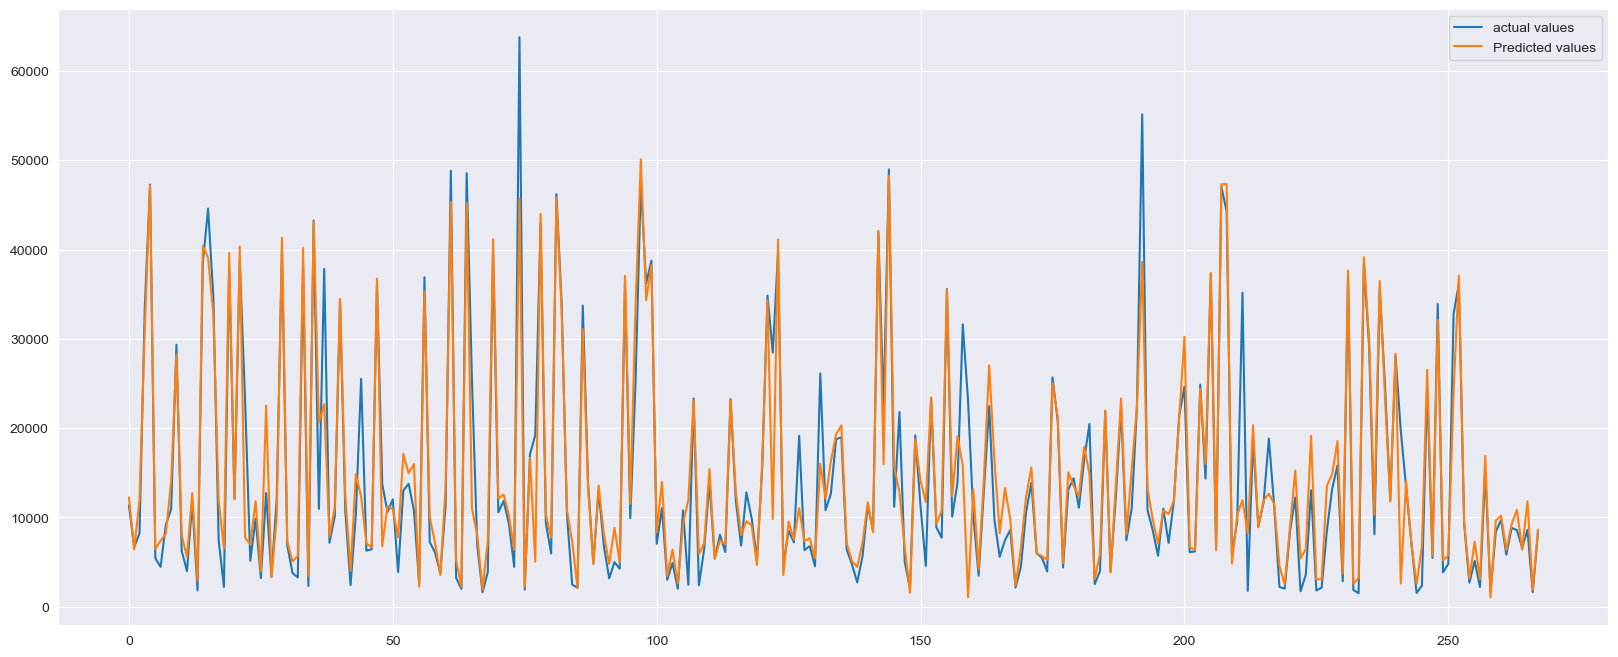

In [214]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],cbr_prediction, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

Mean of actual values :  14731.274552238805
Mean of predicted values:  14867.398623159677


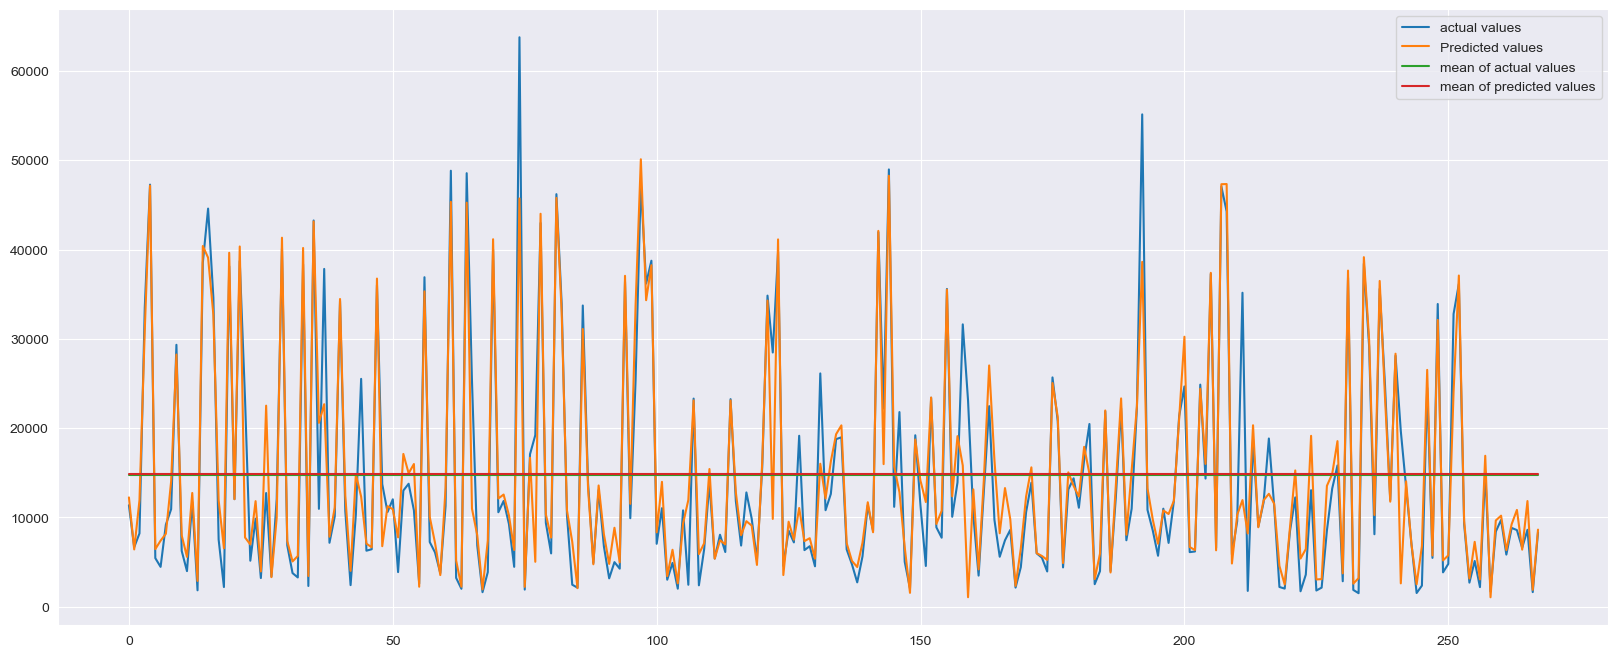

In [215]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# printing the mean 
print("Mean of actual values : ", y_test.mean())
print("Mean of predicted values: ", cbr_prediction.mean())

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],cbr_prediction, label="Predicted values")
plt.plot([i for i in range(len(y_test))],[y_test.mean() for x in range(len(y_test))], label = "mean of actual values")
plt.plot([i for i in range(len(y_test))],[cbr_prediction.mean() for y in range(len(y_test))], label = 'mean of predicted values')

# showing the plotting
plt.legend()
plt.show()

In [216]:
# Importing the required module
from sklearn.metrics import  r2_score

# Evaluating the model
print('R-square score is :', r2_score(y_test, cbr_prediction))

R-square score is : 0.8797842771690105


------------------------------------------------------------------------